<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn import metrics, model_selection, datasets

In [ ]:
x, y = datasets.make_circles(10000)
x = pd.DataFrame(x, columns=['X0', 'X1'])
y = pd.DataFrame(y, columns=['Labels'])

In [ ]:
tf.random.set_seed(34)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),  
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

model_history=model.fit(x, y, epochs=100, callbacks=[lr_schedular]) 
model.evaluate(x, y)

Epoch 1/100
313/313 [==============================] - 1s 1ms/step - loss: 0.7327 - accuracy: 0.4939
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.4733
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.4674
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4362
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.4181
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4480
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4735
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4771
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4832
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6843 - accura

[1.0903738737106323, 0.5]

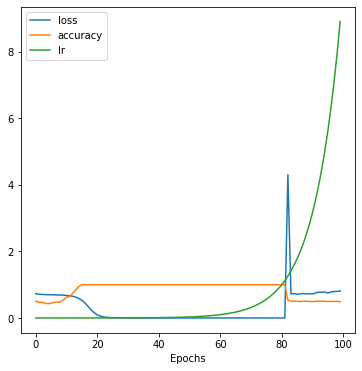

In [ ]:
pd.DataFrame(model_hisory.history).plot(figsize=(6,6), xlabel='Epochs')

Text(0.5, 1.0, 'Learning Rate vs Loss')

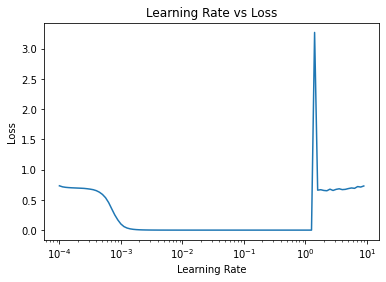

In [ ]:
pp = lambda epoch: 1e-4 * 10 ** (epoch/20)
lrs = pp(tf.range(100))
plt.semilogx(lrs, model_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')